# Honey Production
## Machine Learning - Linear Regression

### Import Python Modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

First, import the dataset of honey production and preview the first few lines of the data.

In [2]:
df = pd.read_csv('US_honey_production_dataset.csv', index_col=0)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,state,colony_number,yield_per_colony,productions,stocks,average_price,value_of_prod,year
0,Alabama,9000,54,73000,73000,240.0,1166000,2010
1,Arizona,24000,77,665000,665000,152.0,2809000,2010
2,Arkansas,25000,60,360000,360000,147.0,2205000,2010
3,California,410000,67,6318000,6318000,155.0,42579000,2010
4,Colorado,34000,56,533000,533000,152.0,2894000,2010


Create a scattor plot of the mean honey production per year. To do so, first calculate the mean of total production per year. 

In [5]:
prod_per_year = df.productions.groupby(df['year']).mean().reset_index()
prod_per_year

,year,productions
0,2010,1.119925e+06
1,2011,9.137500e+05
2,2012,7.915500e+05
3,2013,9.736923e+05
4,2014,1.024750e+06
5,2015,1.045800e+06
6,2016,1.020925e+06
7,2017,7.619500e+05
8,2018,7.247250e+05
9,2019,1.012750e+06


Then, seperate the column of `year` and `productions` in `prod_per_year`. Reshape them into a single column respectively.

In [7]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)

In [17]:
y = prod_per_year['productions']

The scatter plot below seems to suggest a linear relationship between `year` and `production`.

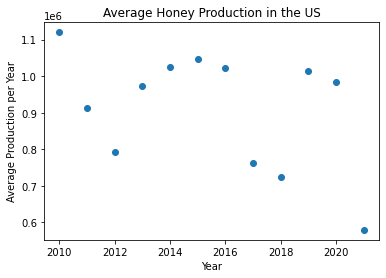

In [30]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Average Production per Year')
plt.title('Average Honey Production in the US')
plt.show()

Create a linear regression model and use the model to find the slope and intercept of the line.

In [28]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_[0], regr.intercept_)

-20309.48090371167 41846658.12040523


Create a list of predicted values using the model and the data of `year`. Then, establish a line of the predicted average production value vs. year on the earlier scatterplot. It seems like the production of honey has been decline according to this linear model.

In [29]:
y_predict = regr.predict(X)

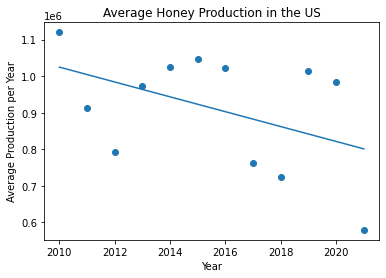

In [32]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Average Production per Year')
plt.title('Average Honey Production in the US')

plt.plot(X, y_predict, '-')
plt.show()

Predict the honey production in year 2050 using this linear model. Produces a column of numbers representing from year 2022 to year 2050.

In [36]:
X_future = np.array(range(2022, 2051))
X_future = X_future.reshape(-1, 1)

In [38]:
future_predict = regr.predict(X_future)

Using this linear model to predict the future honey production. It seems that in year 2050, the average honey production is two hundred thousands.

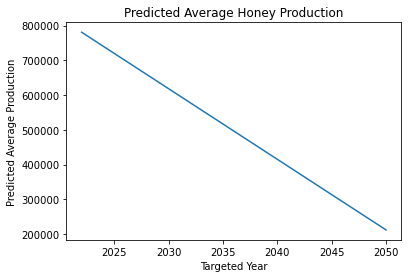

In [42]:
plt.plot(X_future, future_predict)
plt.xlabel('Targeted Year')
plt.ylabel('Predicted Average Production')
plt.title('Predicted Average Honey Production')
plt.show()